In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import time
import math
import pickle

Read data extracted from the dataProcessing notebook:

In [13]:
filename_Xtrain = '../data/X_train.csv'
filename_ytrain = '../data/y_train.csv'
filename_Xtest = '../data/X_test.csv'
filename_ytest = '../data/y_test.csv'

# Set Pandas to show all the columns
pd.set_option('display.max_columns', None)

# Read the data as a dataframe
X_train = pd.read_csv(filename_Xtrain)
y_train = pd.read_csv(filename_ytrain)

X_test = pd.read_csv(filename_Xtest)
y_test = pd.read_csv(filename_ytest)

In [15]:
y_train = y_train.iloc[:,0]
y_test = y_test.iloc[:,0]

### Decision of parameters

After studying the different hyperparameters that can be passed as argument to this model, we selected to adjust the "max_depth" and we will do so using Grid Search Cross Validation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [17]:
from sklearn.tree import DecisionTreeClassifier

time of training: 0.619054933389028 minutes 

best mean cross-validation score: 0.649
best parameters: {'max_depth': 6}


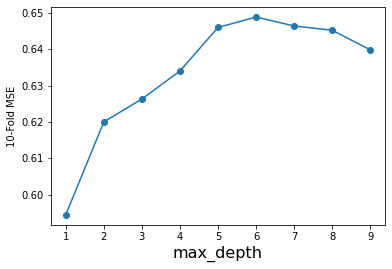

In [18]:
startTime = time.time()

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)

endTime = time.time()
print(f"time of training: {(endTime - startTime)/60} minutes \n")

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#Plot the accuracy for the different "max_depth" use to analyze visually if the given
#optimal value is the best to use
scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

We can see that the most optimal max_depth is 6 and it is quite differentiated from the rest of values

### Train with the best parameters

In [19]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.6606337695096958
Test:  0.6440913103796191


### Save the model

In order to don't have to run it each time

In [23]:
filename = '../models/DecisionTree.sav'
pickle.dump(treeModel, open(filename, 'wb'))

### Load model

In [24]:
# load the model from disk
filename = '../models/DecisionTree.sav'
treeModel = pickle.load(open(filename, 'rb'))
result = treeModel.score(X_test, y_test)
print(result)

0.6440913103796191


### Evaluate the model


--> The classification report is: 
               precision    recall  f1-score   support

         0.0       0.62      0.60      0.61      3684
         1.0       0.66      0.68      0.67      4245

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929



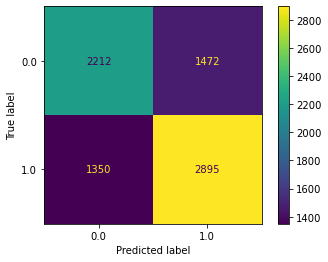

In [25]:
predictionsTree = treeModel.predict(X_test)
print("\n--> The classification report is: \n", classification_report(y_test, predictionsTree))
plot_confusion_matrix(treeModel, X_test, y_test)

We can see that the model is not really accurate. However, it has near to 0.7 recall (from all that we classified as popular, it is significant the number of articles that are actually. popular) and this is good according to our goal

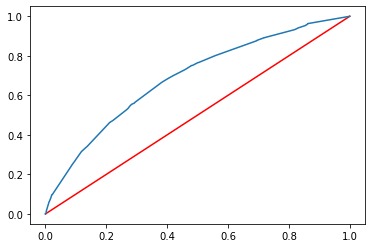

The AUC score is: 0.6868116542550539


In [26]:
probsTree = treeModel.predict_proba(X_test)[:,1]

base_fpr, base_tpr,_ = roc_curve(y_test, [1 for _ in range(len(y_test))])
plt.plot(base_fpr, base_tpr, color = 'r')

fpr,tpr,_ = roc_curve(y_test, probsTree)
plt.plot(fpr,tpr)

plt.show()
print("The AUC score is:", roc_auc_score(y_test,probsTree))

As close this value to 1 is, the best trained model we have. Again, we can confirm that our model is not the best classifier, but we can see that it does well enough